

# Project: Investigate a Dataset - [TMDB Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


> For this project, I chose the TMDb movie data set for my analysis. This dataset contains information of about 10,000 data entries with 21 features for movies collected from The Movie Database (TMDb) on Kaggle, some of the features of the dataset include; popularity, release year, budget, director and revenue. In the coming markdown and code cell of this notebook, I would be investigating this dataset with the aim to find relationship and patterns.


### Question(s) for Analysis
>The following are the research questions that this analysis will answer;
    > 1. What are the top ten lengthy movies?
    > 2. Who directed the top ten profitable movies and what are the titles?
    > 3. Do movies with longer runtime receive better budgeting?
    > 4. What relationship do the numerical features of the data have with revenue?
    

In [2]:
#Importing the necessary packages needed for this analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [3]:
#Loading the data to the notebook
movie_data = pd.read_csv('tmdb-movies.csv')

In [4]:
#Checking the head of the data
movie_data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
#Checking the shape of the data to return the number of rows and columns
movie_data.shape
print("The number of columns in the dataset is", movie_data.shape[1])
print("The number of rows in the dataset is", movie_data.shape[0])

The number of columns in the dataset is 21
The number of rows in the dataset is 10866


In [6]:
#Getting the general information about the data
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
#Getting a quick description about the data
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Observations from the loaded data

  
  
> 1. There are 21 columns and 10866 rows in the dataset.
> 2. There are 11 strings, 6 integers and 4 float datatypes in this dataset.
> 3. Columns budget, runtime, and revenue have zero values as a datapoint. I think this an incomplete information.
> 4. The revenue and budget columns have an identical column for which provision have been made to account for inflation. I will be using the adjusted column on the basis that it provides more information on the time value of money.


### Data Cleaning


In [8]:
#Checking for duplicated rows and dropping them
movie_data.duplicated().any() #This code returns a boolean value of true is there are duplicated rows


True

In [9]:
#Checking the number of duplicaates in the dataset
movie_data.duplicated().sum()

1

In [10]:
#Dropping the dupplicates
movie_data.drop_duplicates(inplace=True)

In [11]:
#Checking the shape of the dataset to comfirm the drop
movie_data.shape

(10865, 21)

##### Duplicates dropped.

> A row in the dataset was duplicated, and it has been dropped. The shape of the dataset was checked to confirm the drop and it returned 10,865 rows, accounting for the duplicate dropped.

In [12]:
#Checking the columns in the dataset to see which ones are not useful for the analysis and can be dropped
movie_data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [13]:
#Dropping irrelevant columns
movie_data.drop(['id','imdb_id','cast','homepage','production_companies', 'vote_count',\
         'release_date','tagline','keywords','overview','budget','revenue'], axis = 1, inplace = True)

In [14]:
#Checking the head of the dataset to account for the dropped columns
movie_data.head()

,popularity,original_title,director,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


##### Dropping columns

> The id','imdb_id','cast','homepage','production_companies', 'vote_count', 'release_date','tagline','keywords','overview','budget','revenue' columns in the dataset have been dropped. These are columns with no direct contribution to my analysis which needed to be drop for my work to be as  tidy as possible.

In [15]:
#Checking the information about the remaining dataset again
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 848.8+ KB


In [16]:
#Checking the description
movie_data.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,102.071790,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,31.382701,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,111.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### Quick Remark.

> A look at the data again shows that there are movie recorded to have zero revenue, budget and runtime. This in my opinion makes an argument for a non-existent movie, and the rows for which there are zero should be dropped to make the room for a more acceptable analysis.

In [17]:
#Dropping rows in Budget, Runtime and Revenue with zero entries
new_data = movie_data.query('runtime > 0' and 'budget_adj > 0' and 'revenue_adj > 0')
new_data.shape

(4849, 9)

In [18]:
#Checking for null values in the new dataset
new_data.isnull().sum()

popularity        0
original_title    0
director          1
runtime           0
genres            0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [19]:
#Dropping the null value in the director column
new_data.dropna(inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
#Creating a profit column to be used in the analysis later
new_data['profit'] = new_data['revenue_adj'] - new_data['budget_adj']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
#Checking the head of the data to confirm the creation of the profit column
new_data.head(1)

,popularity,original_title,director,runtime,genres,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


In [22]:
#Checking the shape of the cleaned data
new_data.shape

(4848, 10)

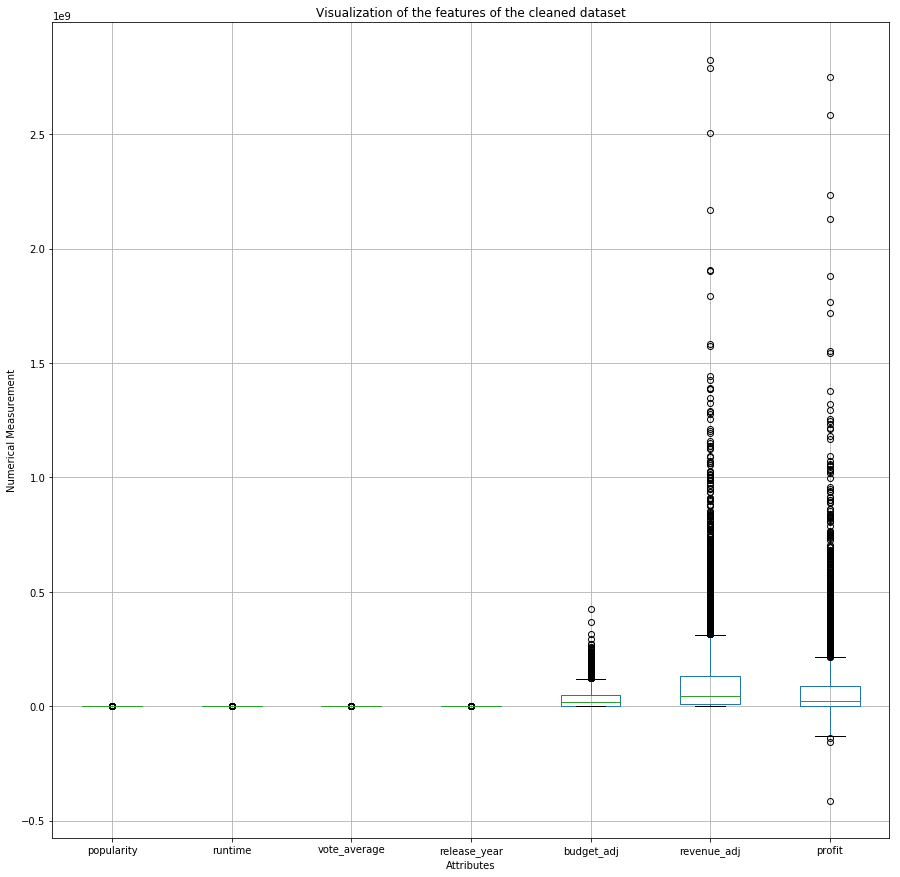

In [39]:
new_data.boxplot(figsize =(15,15))
plt.title("Visualization of the features of the cleaned dataset")
plt.xlabel("Attributes")
plt.ylabel("Numerical Measurement");

##### Final comments on the cleaned data

> The following are the final set of cleaning done to the dataset;

>1. Dropped the zero rows in runtime, budget and revenue columns
>2. Found a null value in the director column and dropped it.
>3. Created a profit column to account for the financial performace of the movies.

>The shape of the cleaned data is now 4848 rows and 10 columns.


> The boxplot of the dataset that there are outliers in the revenue, budget and profit columns. This is an indication to suggest that there are movies who performed more than the normal thresholds/distribution of this dataset. An histogram would be plotted later in the EDA section to better find out about the attributes of each feature of the dataset. 


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What are the top ten lengthy movies and what year were they released?)

In [48]:
#Finding the highhest and lowest movies with runtime using a function
def find_highandlow(i): #name of the function
    
    #finding the index of the highest and lowest using idmin and idmax function
    highest = new_data[i].idxmax()
    lowest = new_data[i].idxmin()
    
    #Giving the result I want to be returned
    print("The movie with the highest "+ i + " is ",new_data['original_title'][highest])
    print("The movie with the lowest "+ i + "  is ",new_data['original_title'][lowest])

#Calling the function to return the highest and lowest movies with their runtime
find_highandlow('runtime')

The movie with the highest runtime is  Band of Brothers
The movie with the lowest runtime  is  Kid's Story


In [24]:
#top ten lengthy movies by year and title
new_data.columns

Index(['popularity', 'original_title', 'director', 'runtime', 'genres',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj', 'profit'],
      dtype='object')

In [25]:
#Using the nlargest function, I am picking the top ten movies with runtime
new_data.nlargest(10, 'runtime')[['original_title','runtime', 'release_year']]

,original_title,runtime,release_year
2722,Band of Brothers,705,2001
2107,Carlos,338,2010
10304,Gettysburg,254,1993
10443,Cleopatra,248,1963
7332,Heaven's Gate,219,1980
9850,Lawrence of Arabia,216,1962
5065,Gods and Generals,214,2003
3110,Jodhaa Akbar,213,2008
8282,Malcolm X,202,1992
4949,The Lord of the Rings: The Return of the King,201,2003


In [26]:
#Making original title the index of the lengthy movies dataframe
lengthy_movies = new_data.nlargest(10, 'runtime')[['original_title','runtime', 'release_year']].set_index('original_title')
lengthy_movies

,runtime,release_year
original_title,,
Band of Brothers,705,2001
Carlos,338,2010
Gettysburg,254,1993
Cleopatra,248,1963
Heaven's Gate,219,1980
Lawrence of Arabia,216,1962
Gods and Generals,214,2003
Jodhaa Akbar,213,2008
Malcolm X,202,1992


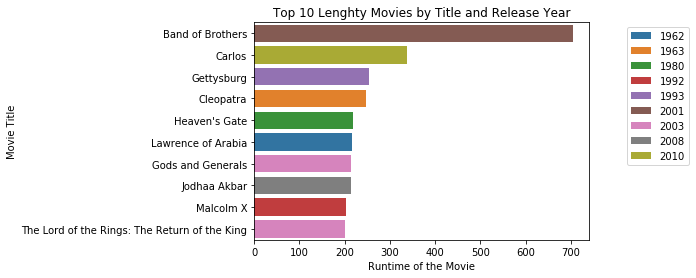

In [40]:
#Plotting the visualization 
sns.barplot(x='runtime', y=lengthy_movies.index, data=lengthy_movies, hue = 'release_year',dodge=False)
plt.legend(bbox_to_anchor = (1.1,1),loc = 2)
plt.title('Top 10 Lenghty Movies by Title and Release Year')
plt.xlabel('Runtime of the Movie')
plt.ylabel('Movie Title');

### Remarks: Top Ten Lengthy Movies by Title

The analysis performed above shows that 'Band of Brothers is the movie with the longest runtime of 705 minutes and was produced in the year 2001. The analysis showed that movies from 2011 upwards were made with a runtime lesser than 200 minutes. There is no further proof to suggest the cause of this. 

The analysis also showed that Kid's Story is the movie with the lowest runtime.

### Checking the distribution of the individual attributes of the dataset

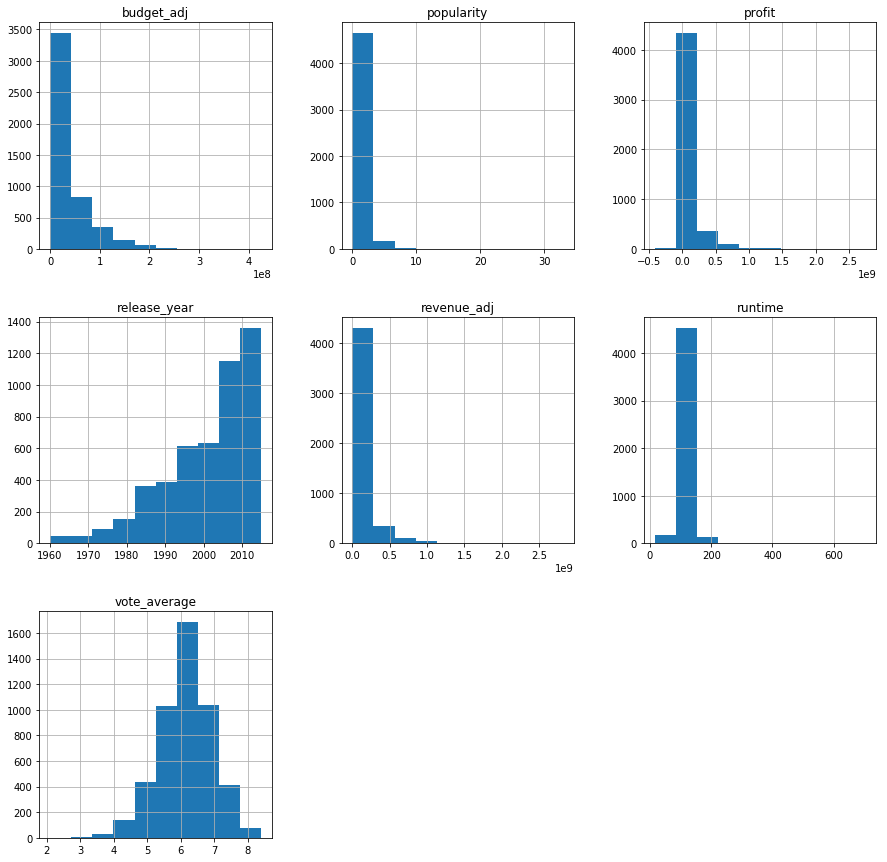

In [47]:
new_data.hist(figsize =(15,15));

### Remarks for the histograms.

1. The number of movies produced increased exponentially over the years.
2. The vote received by the movies are normally distributed.
3. The average runtime of the movies is between 75 and 180 minutes.
4. Revenue, popularity, budget and profit are skewed to the right.

### Research Question 2  (Who directed the top ten profitable movies and what are the titles?)

In [49]:
#Calling the  high and low function to return the highest and lowest movies with profit
find_highandlow('profit')

The movie with the highest profit is  Star Wars
The movie with the lowest profit  is  The Warrior's Way


In [28]:
#Creating a dataframe of the top ten profit and filtering them by title and director 
top_profit = new_data.nlargest(10,'profit')[['profit','original_title','director']].set_index('original_title')
top_profit

,profit,director
original_title,,
Star Wars,2.750137e+09,George Lucas
Avatar,2.586237e+09,James Cameron
Titanic,2.234714e+09,James Cameron
The Exorcist,2.128036e+09,William Friedkin
Jaws,1.878643e+09,Steven Spielberg
E.T. the Extra-Terrestrial,1.767968e+09,Steven Spielberg
Star Wars: The Force Awakens,1.718723e+09,J.J. Abrams
The Net,1.551568e+09,Irwin Winkler
One Hundred and One Dalmatians,1.545635e+09,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman


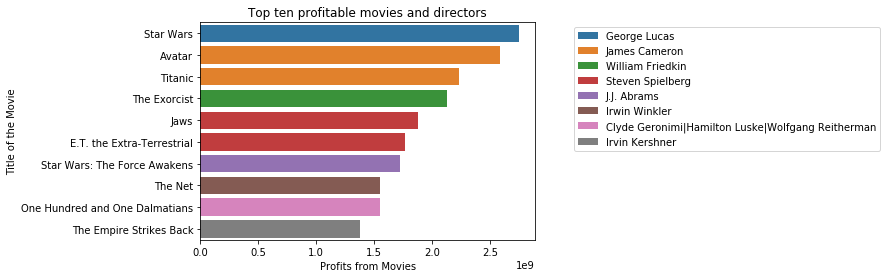

In [43]:
#Plotting the visualization
sns.barplot(y =top_profit.index, x = 'profit', data = top_profit, hue = 'director',dodge=False)
plt.legend(bbox_to_anchor = (1.1,1),loc = 2)
plt.title('Top ten profitable movies and directors')
plt.xlabel('Profits from Movies')
plt.ylabel('Title of the Movie');

### Remarks: Directors of the ten most profitable movies

The movie with the highest profit is  Star Wars.

The movie with the lowest profit  is  The Warrior's Way.

George Lucas of Star Wars movie is the most profitable director. He is followed by James Cameron, William Friedkin, Steven Speilberg and J.J. Adams in that order. 

James Cameron directed two movies on the list - Avatar and Titanic.

The same goes for Stevn Speilberg who directed Star Wars: The force awakens and ET, the Extra-Terrestrial.

The movie, One Hundred and One Delmatians which is the 9th profitbale movie on the list was directed by three people. They are; Clyde Geronimi, Hamilton Luske, and Wolfgang Reitherman. 

### Research Question 3 (Do movies with longer runtime receive better budgeting?)

In [50]:
#Calling the  high and low function to return the highest and lowest movies with budgeting
find_highandlow('budget_adj')

The movie with the highest budget_adj is  The Warrior's Way
The movie with the lowest budget_adj  is  Mr. Holmes


In [30]:
#Do movies with longer runtime receive better budgets
new_data.columns

Index(['popularity', 'original_title', 'director', 'runtime', 'genres',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj', 'profit'],
      dtype='object')

In [31]:
#Find the median of the runtime distribution
median = new_data['runtime'].median()
median

104.0

In [44]:
#Creating a low and high running time dataframe 
low_time = new_data.query('runtime < {}'.format(median))
high_time = new_data.query('runtime >= {}'.format(median))

#Finding the average budget per runtime
mean_budget_lowtime = low_time['budget_adj'].mean()
mean_budget_hightime = high_time['budget_adj'].mean()

#Calculating the difference in the average budget for high and low runtime
budget_difference = mean_budget_hightime - mean_budget_lowtime
budget_difference


19776308.92573287

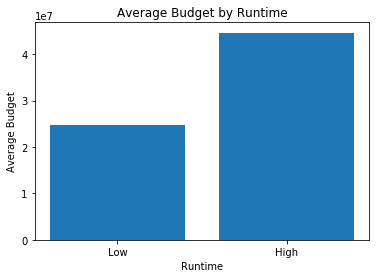

In [33]:
#Creating the visualization
locations = [1,2]
heights = [mean_budget_lowtime, mean_budget_hightime]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title("Average Budget by Runtime")
plt.xlabel('Runtime')
plt.ylabel('Average Budget');

### Remarks: Better Budgeting and Runtime.

The analysis in the segment shows that longer movies have the greater budgets. I categorized a movie below the median of the runtime as a low-running time movie to achieve this. The use of the median helps in make a middle ground assessment of the runtime distribution.

There is an average difference of about 17 million between the budgets for longer running time movies and the shorter ones.

### Research Question 4  (What relationship do the numerical features of the data have with revenue?)

In [34]:
#Checking the columns in the data frame again
new_data.columns

Index(['popularity', 'original_title', 'director', 'runtime', 'genres',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj', 'profit'],
      dtype='object')

In [35]:
#Creating a correlation using the .corr() function
correlation = new_data.corr()
correlation

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj,profit
popularity,1.000000,0.201607,0.288947,0.170374,0.439995,0.561716,0.523930
runtime,0.201607,1.000000,0.308407,-0.099766,0.304592,0.264275,0.222296
vote_average,0.288947,0.308407,1.000000,-0.094779,0.049030,0.242284,0.260893
release_year,0.170374,-0.099766,-0.094779,1.000000,0.083403,-0.099387,-0.132694
budget_adj,0.439995,0.304592,0.049030,0.083403,1.000000,0.593251,0.420585
revenue_adj,0.561716,0.264275,0.242284,-0.099387,0.593251,1.000000,0.979867
profit,0.523930,0.222296,0.260893,-0.132694,0.420585,0.979867,1.000000


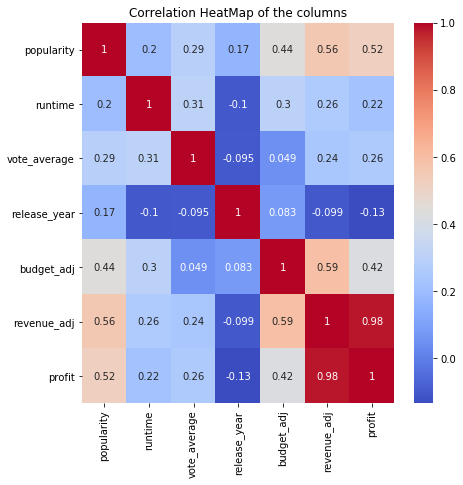

In [36]:
#Creating the Visualization
plt.figure(figsize=(7,7))
sns.heatmap(correlation, annot=True, cmap = 'coolwarm')
plt.title('Correlation HeatMap of the columns');

### Remarks: Revenue Vs other features

##### Revenue and runtime
> There is a correlation value of 0.26 which suggests that there is no high relation between the revenue and the runtime of the movie.

##### Revenue and Budget
> The correlation score between budget and revenue is 0.59, this suggests that with an increase in the budgeting, there would be a corresponding increase in the revenue.

##### Popularity and Revenue.
> The more popular a movie become, the greater the revenue generated. The 0.56 correlation score suggests this.

##### Revenue and Voting
> With a correlation score of 0.26, this also suggest that there are no strong relationships between voting and revenue of the movies.

<a id='conclusions'></a>
## Conclusions

The following are the findings of this analysis;
1. Longer running movies have the greater budgets.
2. Band of Brothers is the movie with the longest runtime and it  was produced in the year 2001.
3. George Lucas of Star Wars movie is the most profitable director
4. The correlation between revenue and popularity suggests that, the more popular a movie becomes, the greater its revenue.
5. Better budgeted movies have prospects of making high revenue.


### Limitation
The data set have more than half of its entries filled with zero values in the revenue, budget and runtime columns. This significantly reduced the size of the dataset as they were dropped.


In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0